In [1]:
#  KNN, LMNN, SVM, ENN,

In [2]:
#install packets
#!pip3 install pylmnn
# !pip install enn

In [62]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import time


from enn.enn import ENN
from pylmnn import LargeMarginNearestNeighbor as LMNN
from scipy.spatial.distance import euclidean, mahalanobis
from sklearn.neighbors import DistanceMetric
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# matplotlib.style.use('seaborn')
print (sklearn.__version__)

0.20.2


In [66]:
path='glass.csv'

df=pd.read_csv(path)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [67]:
df.shape

(214, 10)

In [68]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [69]:
type=df['Type'].groupby(df['Type']).count()
type

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

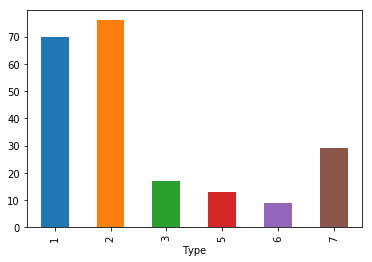

In [71]:
type.plot('bar')

In [86]:
# get column titles except the last column
features=df.columns[:-1].tolist()

# get data set features
X=df[features].values
# get labels
y=df['Type'].values

# split data to train data set and test data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
# store scores of KNN model by K=1 to 31
scores=[]

In [87]:
# loop k from 1 to 8, and get cross validation score of each K value
for k in range(1,9):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=5)
    score_mean=score_val.mean()
    scores.append(score_mean)

In [82]:
scores

[0.7171597361303244,
 0.6600929978871155,
 0.655028940323058,
 0.6724360714801891,
 0.6261912848677554,
 0.6314072963337669,
 0.6269557859999036,
 0.5806998585675056]

In [88]:
# get index of maxium score along axis, default axis=0 for 1 dimensional array
best_k=np.argmax(scores)+1
print(best_k)
# generate KNN model
knn=KNeighborsClassifier(best_k)
# fit with train data set
knn.fit(X_train,y_train)
# get Modes presicion rate using test set
print("prediction precision rate:",knn.score(X_test,y_test))

1
prediction precision rate: 0.7209302325581395


In [100]:
%%time
scores=[]
# loop k from 1 to 8, and get cross validation score of each K value
k_test, n_components, max_iter = 5, X.shape[1], 1000
for k in range(1,8):
    # Instantiate the metric learner
    lmnn = LMNN(n_neighbors=k, max_iter=max_iter, n_components=n_components)
    # Train the metric learner
    lmnn.fit(X_train, y_train)
    # Fit the nearest neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k_test)
    knn.fit(lmnn.transform(X_train), y_train)
    score_val=cross_val_score(knn,lmnn.transform(X_train),y_train,scoring='accuracy',cv=5)
    score_mean=score_val.mean()
    scores.append(score_mean)



Wall time: 33.3 s


In [104]:
best_k

4

In [102]:
# get index of maxium score along axis, default axis=0 for 1 dimensional array
best_k=np.argmax(scores)+1
print(best_k)
# Instantiate the metric learner
lmnn = LMNN(n_neighbors=int(best_k), max_iter=max_iter, n_components=n_components)
# Train the metric learner
lmnn.fit(X_train, y_train)
# generate KNN model
knn=KNeighborsClassifier(n_neighbors=best_k)
# fit with train data set
knn.fit(lmnn.transform(X_train), y_train)
# get Modes presicion rate using test set
print("prediction precision rate:",knn.score(lmnn.transform(X_test),y_test))

4
prediction precision rate: 0.7441860465116279


In [33]:
# The implementation is based on libsvm. 
# The fit time complexity is more than quadratic with the number of samples 
# which makes it hard to scale to dataset with more than a couple of 10000 samples.

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
print("prediction precision rate:",clf.score(X_test,y_test))

prediction precision rate: 0.6046511627906976


In [49]:
y_pred = clf.predict(X_test)
print(clf)
print('Train scores')
print('accuracy_score = ', accuracy_score(y_test, y_pred))
print('precision_score = ', precision_score(y_test, y_pred, average='macro'))
print('recall_score = ', recall_score(y_test, y_pred, average='macro'))
print('f1_score = ', f1_score(y_test, y_pred, average='macro'))
#print('roc_auc_score = ', roc_auc_score(y_train, y_pred))

ENN(distance_function=<function euclidean at 0x0000000008B8CE18>, k=3)
Train scores
accuracy_score =  0.6511627906976745
precision_score =  0.6623168498168498
recall_score =  0.8238304093567251
f1_score =  0.6942849548112706


In [51]:
y_pred, y_test;

In [52]:
clf = ENN()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf)
print('Train scores')
print('accuracy_score = ', accuracy_score(y_test, y_pred))
print('precision_score = ', precision_score(y_test, y_pred, average='macro'))
print('recall_score = ', recall_score(y_test, y_pred, average='macro'))
print('f1_score = ', f1_score(y_test, y_pred, average='macro'))

ENN(distance_function=<function euclidean at 0x0000000008B8CE18>, k=3)
Train scores
accuracy_score =  0.6511627906976745
precision_score =  0.6623168498168498
recall_score =  0.8238304093567251
f1_score =  0.6942849548112706


In [53]:
# Улучшение скора
# Get balanced sample by oversampling
df3=df[df['Type']==3]
df3=pd.concat([df3]*4)
df5=df[df['Type']==5]
df5=pd.concat([df5]*5)
df6=df[df['Type']==6]
df6=pd.concat([df6]*7)
df7=df[df['Type']==7]
df7=pd.concat([df7]*2)
df1=df[df['Type']==1]
df2=df[df['Type']==2]
df_balanced=pd.concat([df1,df2,df3,df5,df6,df7])
df_balanced.shape

(400, 10)

In [58]:
df[df['Type']==3].shape

(17, 10)

In [54]:
type=df_balanced['Type'].groupby(df_balanced['Type']).count()
type

Type
1    70
2    76
3    68
5    65
6    63
7    58
Name: Type, dtype: int64

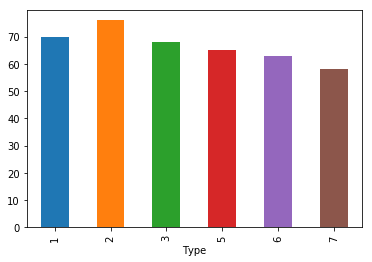

In [59]:
type.plot('bar')

In [60]:
# df.columns is column labels property
features=df_balanced.columns[:-1].tolist()
X=df_balanced[features].values
y=df_balanced['Type']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [61]:
scores=[]
for i in range(32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
print("prediction precision rate:",knn.score(X_test,y_test))

best K is: 1
prediction precision rate: 0.9
